In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import cv2
from keras.models import model_from_json
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
train_generator = train_data_gen.flow_from_directory(
    'C:\\Users\\91939\\Downloads\\emotion\\train',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [4]:
validation_generator = validation_data_gen.flow_from_directory(
        'C:\\Users\\91939\\Downloads\\emotion\\test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [6]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                         input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
emotion_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           7,175 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,345,607 (8.95 MB)

 Trainable params: 2,345,607 (8.95 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
cv2.ocl.setUseOpenCL(False)
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000, 
                               decay_rate=0.96)
optimizer = Adam(learning_rate=lr_schedule)
emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
                      metrics=['accuracy'])

In [8]:
emotion_model_info = emotion_model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    batch_size=32
)

Epoch 1/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 441s 958ms/step - accuracy: 0.2505 - loss: 1.8291 - val_accuracy: 0.3376 - val_loss: 1.7034
Epoch 2/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 142s 315ms/step - accuracy: 0.3439 - loss: 1.6697 - val_accuracy: 0.4076 - val_loss: 1.5592
Epoch 3/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 142s 314ms/step - accuracy: 0.4021 - loss: 1.5548 - val_accuracy: 0.4333 - val_loss: 1.4857
Epoch 4/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 141s 313ms/step - accuracy: 0.4288 - loss: 1.4884 - val_accuracy: 0.4564 - val_loss: 1.4209
Epoch 5/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 141s 314ms/step - accuracy: 0.4544 - loss: 1.4264 - val_accuracy: 0.4791 - val_loss: 1.3642
Epoch 6/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 141s 314ms/step - accuracy: 0.4742 - loss: 1.3754 - val_accuracy: 0.4999 - val_loss: 1.3146
Epoch 7/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 142s 315ms/step - accuracy: 0.5050 - loss: 1.3168 - val_accuracy: 0.5167 - val_loss: 1.2838
Epoch 8/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 142s 315ms/step - accuracy: 0.5248 -

In [9]:
emotion_model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.5774 - loss: 1.1058


[1.1200734376907349, 0.5755084753036499]

In [10]:
accuracy = emotion_model_info.history['accuracy']
val_accuracy = emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']

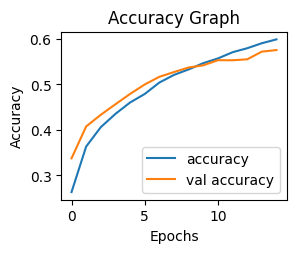

In [11]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.subplot(2, 2, 4)
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

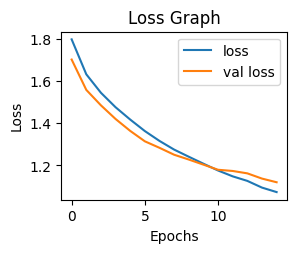

In [12]:
# loss graph
plt.subplot(2, 2, 2)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)
json_file = open('emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

In [53]:
emotion_model.save('emotion_model.h5', save_format='h5')